In [2]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from pre_processing import normalize

In [3]:
mnist = tf.keras.datasets.california_housing
(x_train, y_train),(x_test, y_test) = mnist.load_data()

features = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "Population",
    "AveOccup",
    "Latitude",
    "Longitude",
]

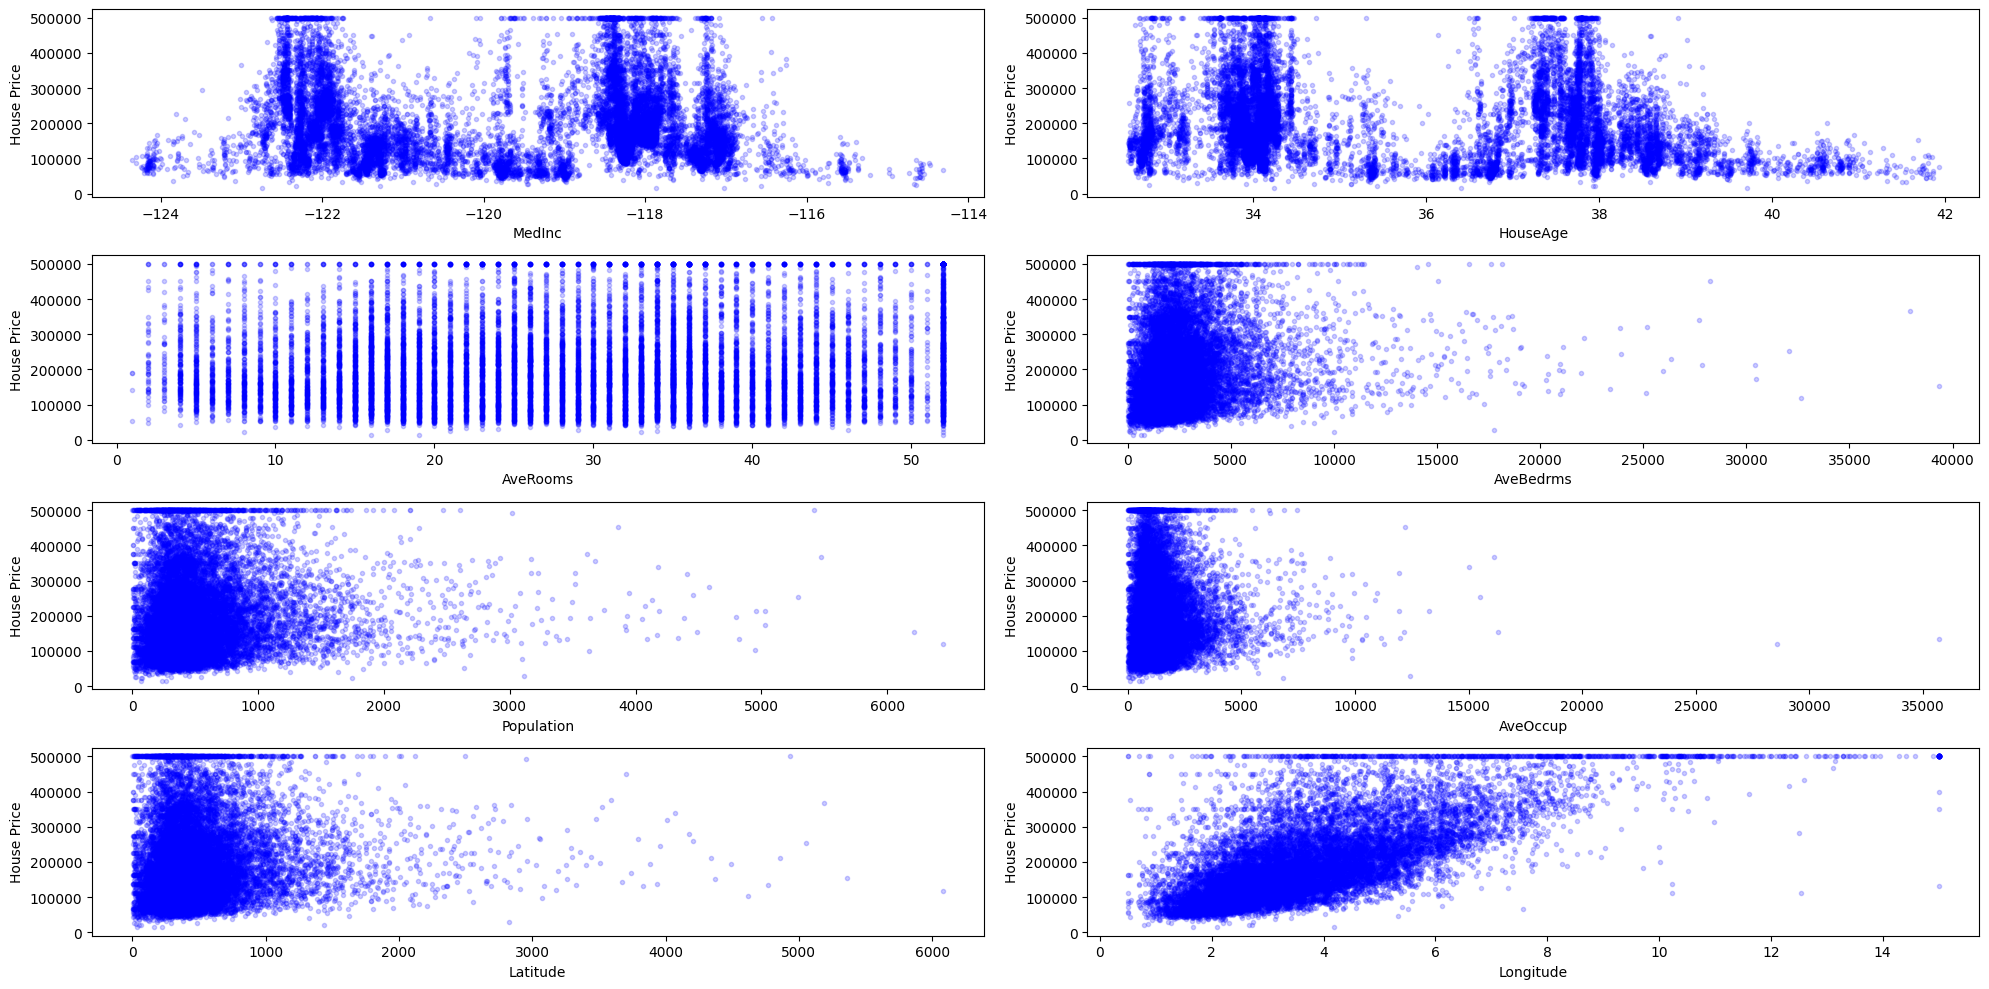

In [4]:
subplts_for_row = 2
n_rows = len(features) // 2

fig, axes = plt.subplots(n_rows, subplts_for_row, figsize = (20, 10))
for y in range(n_rows):
    for x in range(subplts_for_row):
        axe = axes[y, x]
        x_train_jx = x_train[:, y * subplts_for_row + x]

        axe.scatter(x_train_jx, y_train, marker = ".", color = "blue", alpha = 0.2)
        axe.set_xlabel(f"{features[y * subplts_for_row + x]}")
        axe.set_ylabel(f"House Price")
plt.tight_layout()
plt.show()

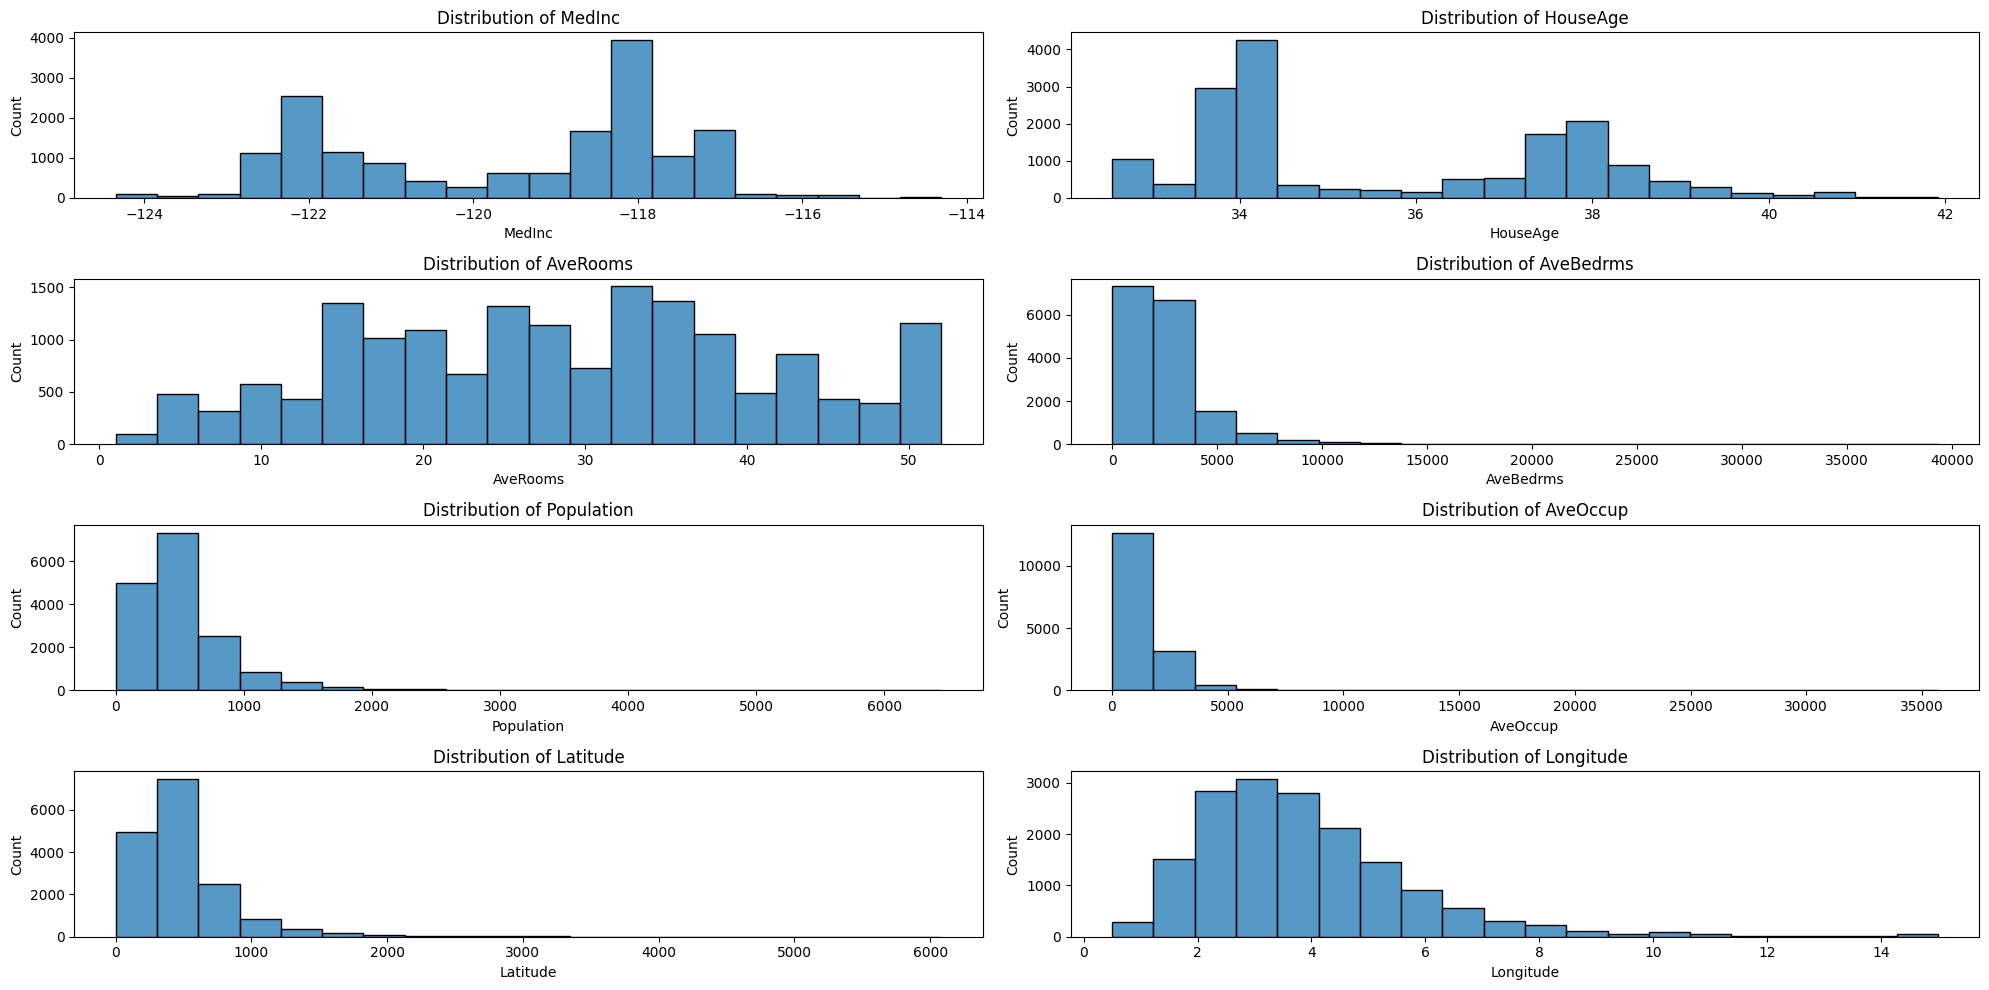

In [5]:
fig, axes = plt.subplots(n_rows, subplts_for_row, figsize = (20, 10))

for y in range(n_rows):
    for x in range(subplts_for_row):
        axe = axes[y, x]
        feature = y * subplts_for_row + x
        x_train_jx = x_train[:, feature]
        df = pd.DataFrame({features[feature]: x_train_jx})

        sns.histplot(df, ax = axe, x = f"{features[feature]}", bins = 20)
        axe.set_title(f"Distribution of {features[feature]}")

plt.tight_layout()
plt.show()



In [6]:
normalized_X_train, x_scaler = normalize.normalize(x_train)
normalized_X_test = normalize.normalize(x_test, x_scaler)

normalized_y_train, y_scaler = normalize.normalize(y_train.reshape(-1, 1))
normalized_y_test = normalize.normalize(y_test.reshape(-1, 1), y_scaler)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            46 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46 (184.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0646 - root_mean_squared_error: 0.2539 - val_loss: 0.0428 - val_root_mean_squared_error: 0.2068
Epoch 2/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0393 - root_mean_squared_error: 0.1981 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1819
Epoch 3/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0324 - root_mean_squared_error: 0.1800 - val_loss: 0.0292 - val_root_mean_squared_error: 0.1709
Epoch 4/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0292 - root_mean_squared_error: 0.1710 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1656
Epoch 5/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0283 - root_mean_squared_error: 0.1681 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1621
Epoch 6/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0271 - root_mean_squared_error: 0.1647 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1593
Epoch 7/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step 

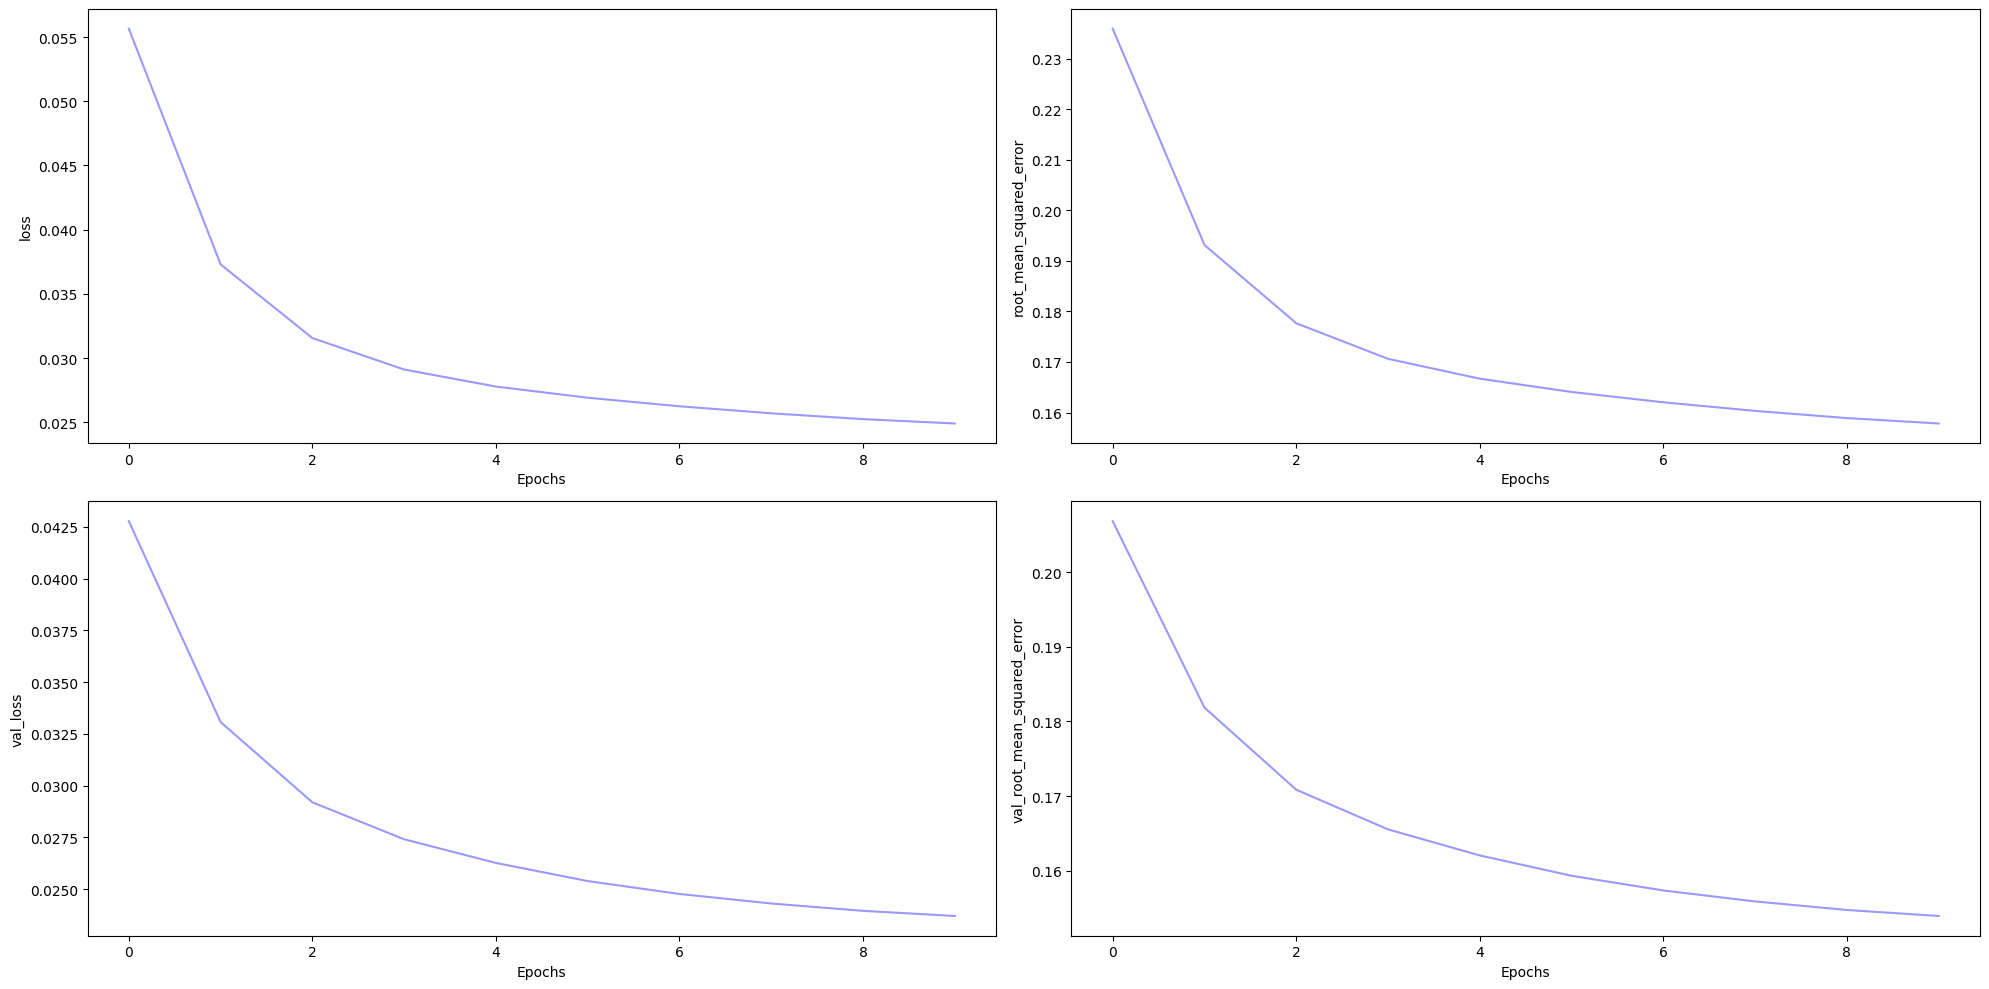

In [7]:
from models.Polynomial_Regression import PolynomialRegression

poly_regression = PolynomialRegression(order = 2, lr = 0.01)
poly_regression.fit(X = normalized_X_train, y = normalized_y_train)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0640 - root_mean_squared_error: 0.2507 - val_loss: 0.0456 - val_root_mean_squared_error: 0.2135
Epoch 2/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0425 - root_mean_squared_error: 0.2062 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1913
Epoch 3/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0338 - root_mean_squared_error: 0.1839 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1693
Epoch 4/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0278 - root_mean_squared_error: 0.1667 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1570
Epoch 5/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0250 - root_mean_squared_error: 0.1580 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1518
Epoch 6/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1491
Epoch 7/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

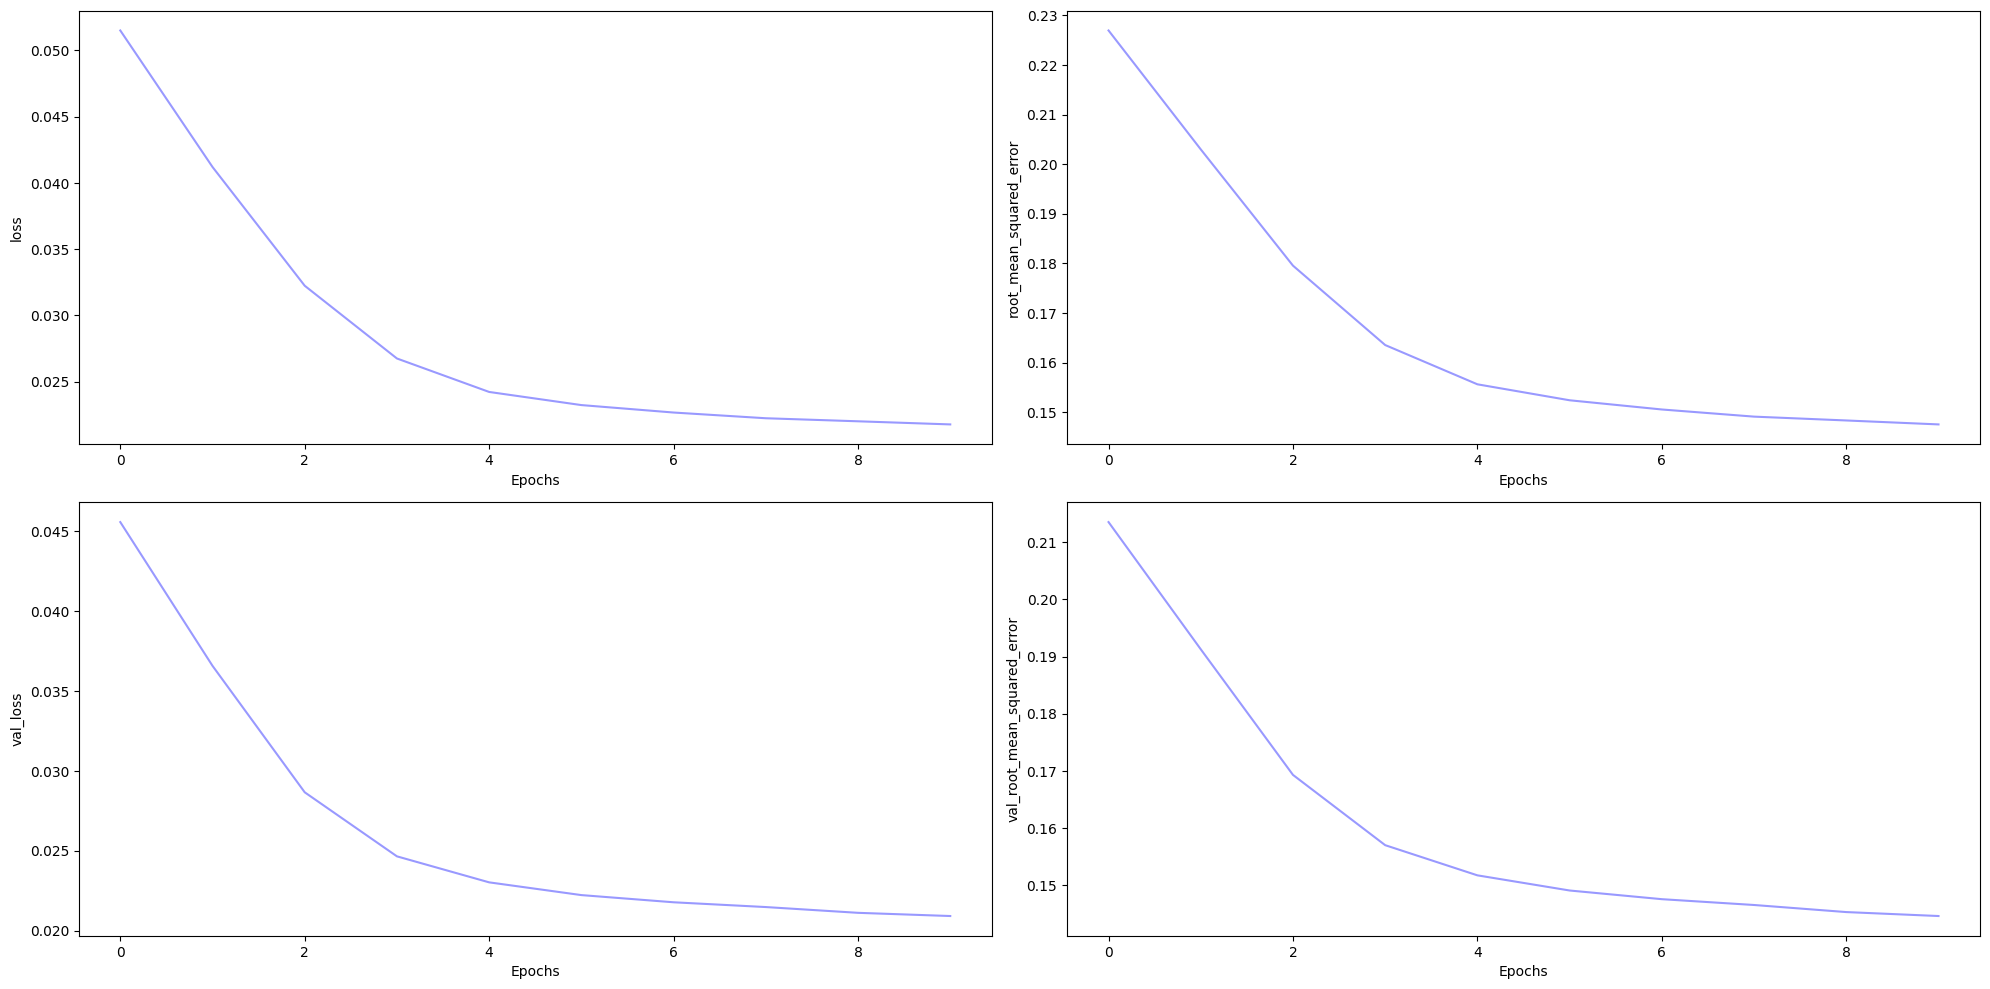

In [8]:
from models.ANN import ANN

ann_model = ANN(input_shape = normalized_X_train[0].shape, output_shape = 1, learning_rate = 0.01, epochs = 10)
ann_model.fit(X = normalized_X_train, y = normalized_y_train)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0738 - root_mean_squared_error: 0.2713 - val_loss: 0.0491 - val_root_mean_squared_error: 0.2215
Epoch 2/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0446 - root_mean_squared_error: 0.2112 - val_loss: 0.0384 - val_root_mean_squared_error: 0.1959
Epoch 3/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0367 - root_mean_squared_error: 0.1916 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1818
Epoch 4/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0326 - root_mean_squared_error: 0.1806 - val_loss: 0.0299 - val_root_mean_squared_error: 0.1730
Epoch 5/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0303 - root_mean_squared_error: 0.1742 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1673
Epoch 6/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0283 - root_mean_squared_error: 0.1683 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1636
Epoch 7/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step 

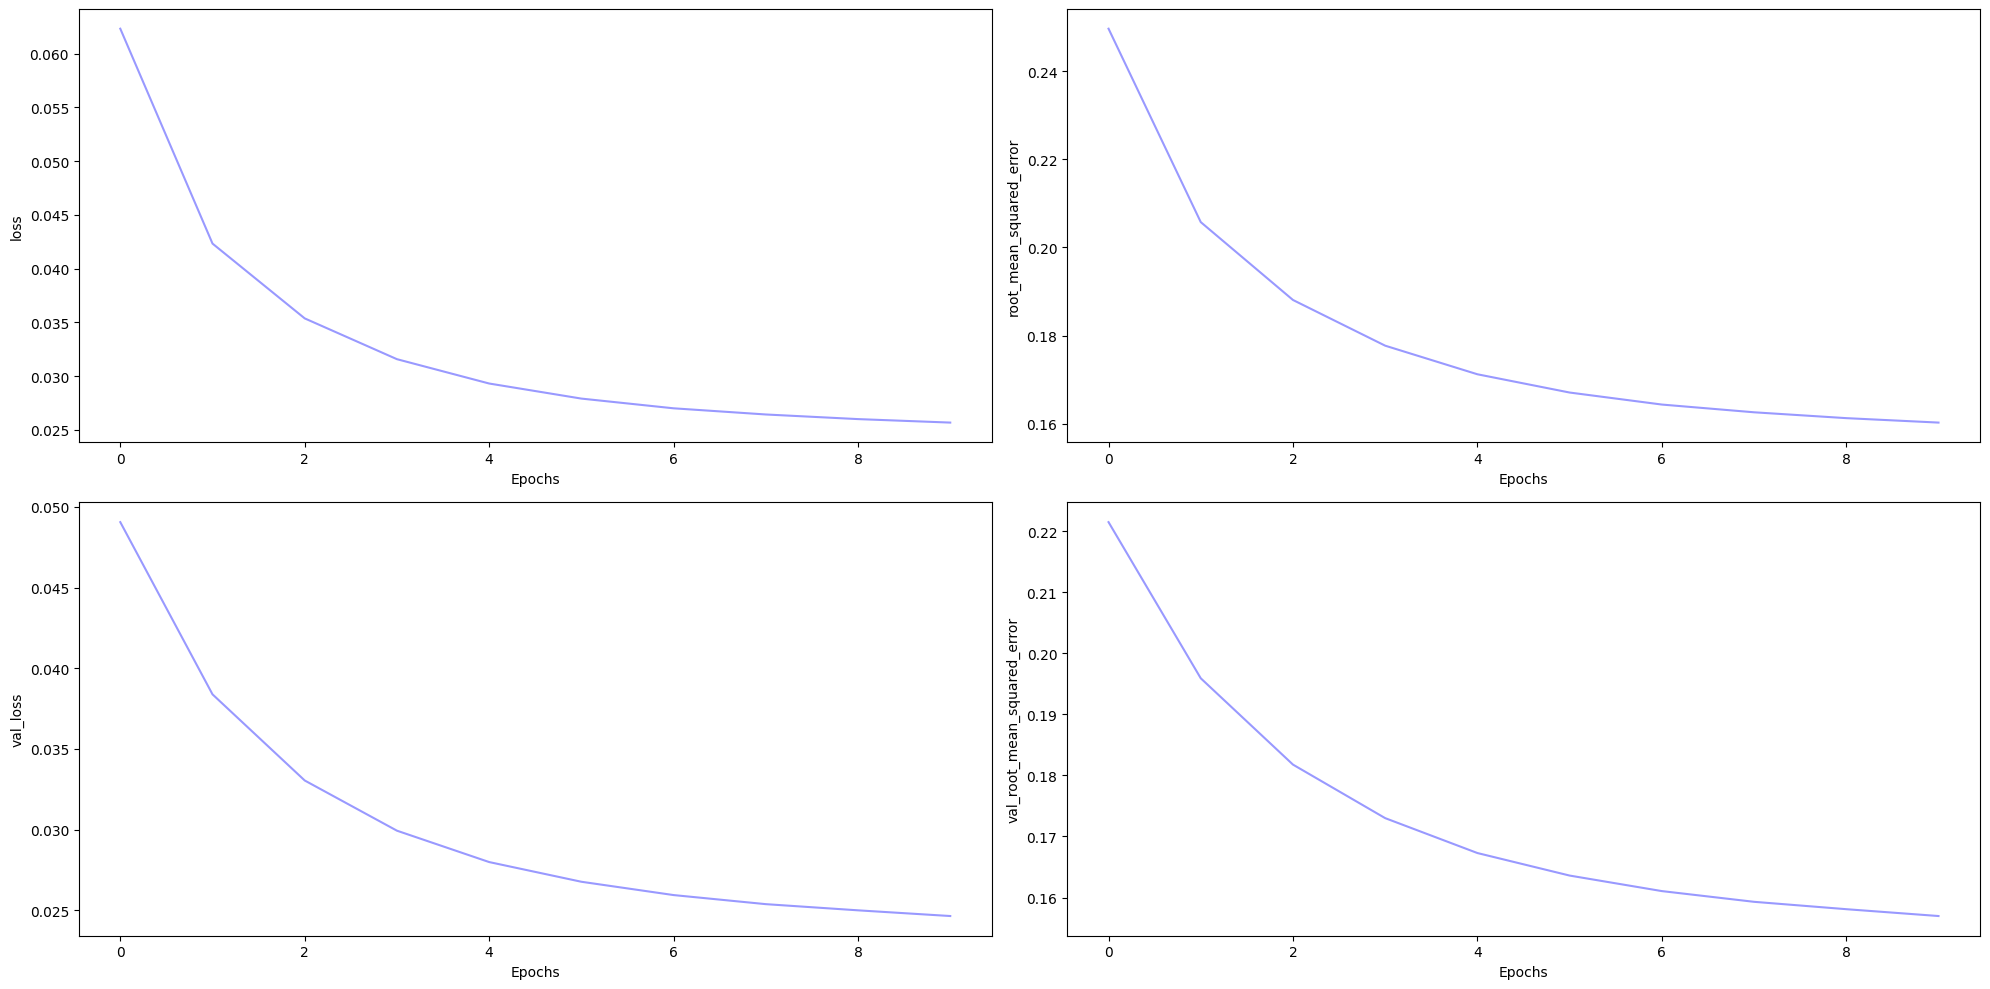

In [9]:
from models.Linear_Regression import LinearRegression

linear_regression_model = LinearRegression(input_shape = normalized_X_train[0].shape, output_shape = 1, lr = 0.01, epochs = 10)
linear_regression_model.fit(X = normalized_X_train, y = normalized_y_train)
